In [1]:
# library to import .mat file
import scipy.io as sio
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle

In [2]:
# laoding the .mat file
preProcess = ['TCC']
Thrs = ['GL','LG','LT','SD']
MeMs =['Fastcore','Swiftcore','MBA','mCADRE','GIMME','TOCS']
# dataframe to store the data
df = pd.DataFrame(columns=['PreProcess','Threshold','MeM','Model','Accuracy','Sensitivity','Specificity','Precision','F1-score','MCC','ROC-AUC'])
for pre in preProcess:
    for thr in Thrs:
        for mem in MeMs:
            for i in range(1,65):
                data = sio.loadmat('./Kim_et_al/GeneEss/'+pre+'/'+thr+'/'+mem+'/m'+str(i)+'.mat')
                # concatinating the data
                df_temp = pd.DataFrame({'PreProcess':pre,'Threshold':thr,'MeM':mem,'Model':'E'+str(2198+i),
                'Accuracy':data['accuracy'][0][0],'Sensitivity':data['sensitivity'][0][0],'Specificity':data['specificity'][0][0],'Precision':data['precision'][0][0],
                'F1-score':data['F1'][0][0],'MCC':data['MCC'][0][0],'ROC-AUC':data['roc_auc'][0][0]},index=[0])
                df = pd.concat([df,df_temp])
df = df.reset_index(drop=True)
df['Threshold'] = df['Threshold'].map({'GL':'Global-80','LG':'LocalGini','LT':'LocalT2','SD':'StanDep'})
df['Pre-Processing Method'] = df['PreProcess'].map({'FCC':'FastCC','TCC':'ThermOptCC'})
df.head()


C:\Users\rxpav\AppData\Local\Temp\ipykernel_34900\3975747364.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp])


,PreProcess,Threshold,MeM,Model,Accuracy,Sensitivity,Specificity,Precision,F1-score,MCC,ROC-AUC,Pre-Processing Method
0,TCC,Global-80,Fastcore,E2199,0.751553,0.848485,0.733945,0.366812,0.512195,0.438852,0.791215,ThermOptCC
1,TCC,Global-80,Fastcore,E2200,0.704974,0.884211,0.670082,0.342857,0.494118,0.414734,0.768031,ThermOptCC
2,TCC,Global-80,Fastcore,E2201,0.723869,0.821782,0.705556,0.342975,0.483965,0.396326,0.752630,ThermOptCC
3,TCC,Global-80,Fastcore,E2202,0.747024,0.826923,0.732394,0.361345,0.502924,0.422976,0.779894,ThermOptCC
4,TCC,Global-80,Fastcore,E2203,0.727575,0.860000,0.701195,0.364407,0.511905,0.427828,0.780598,ThermOptCC


In [12]:
df = df[(df['MeM']=='Fastcore') | (df['MeM']=='TOCS')]

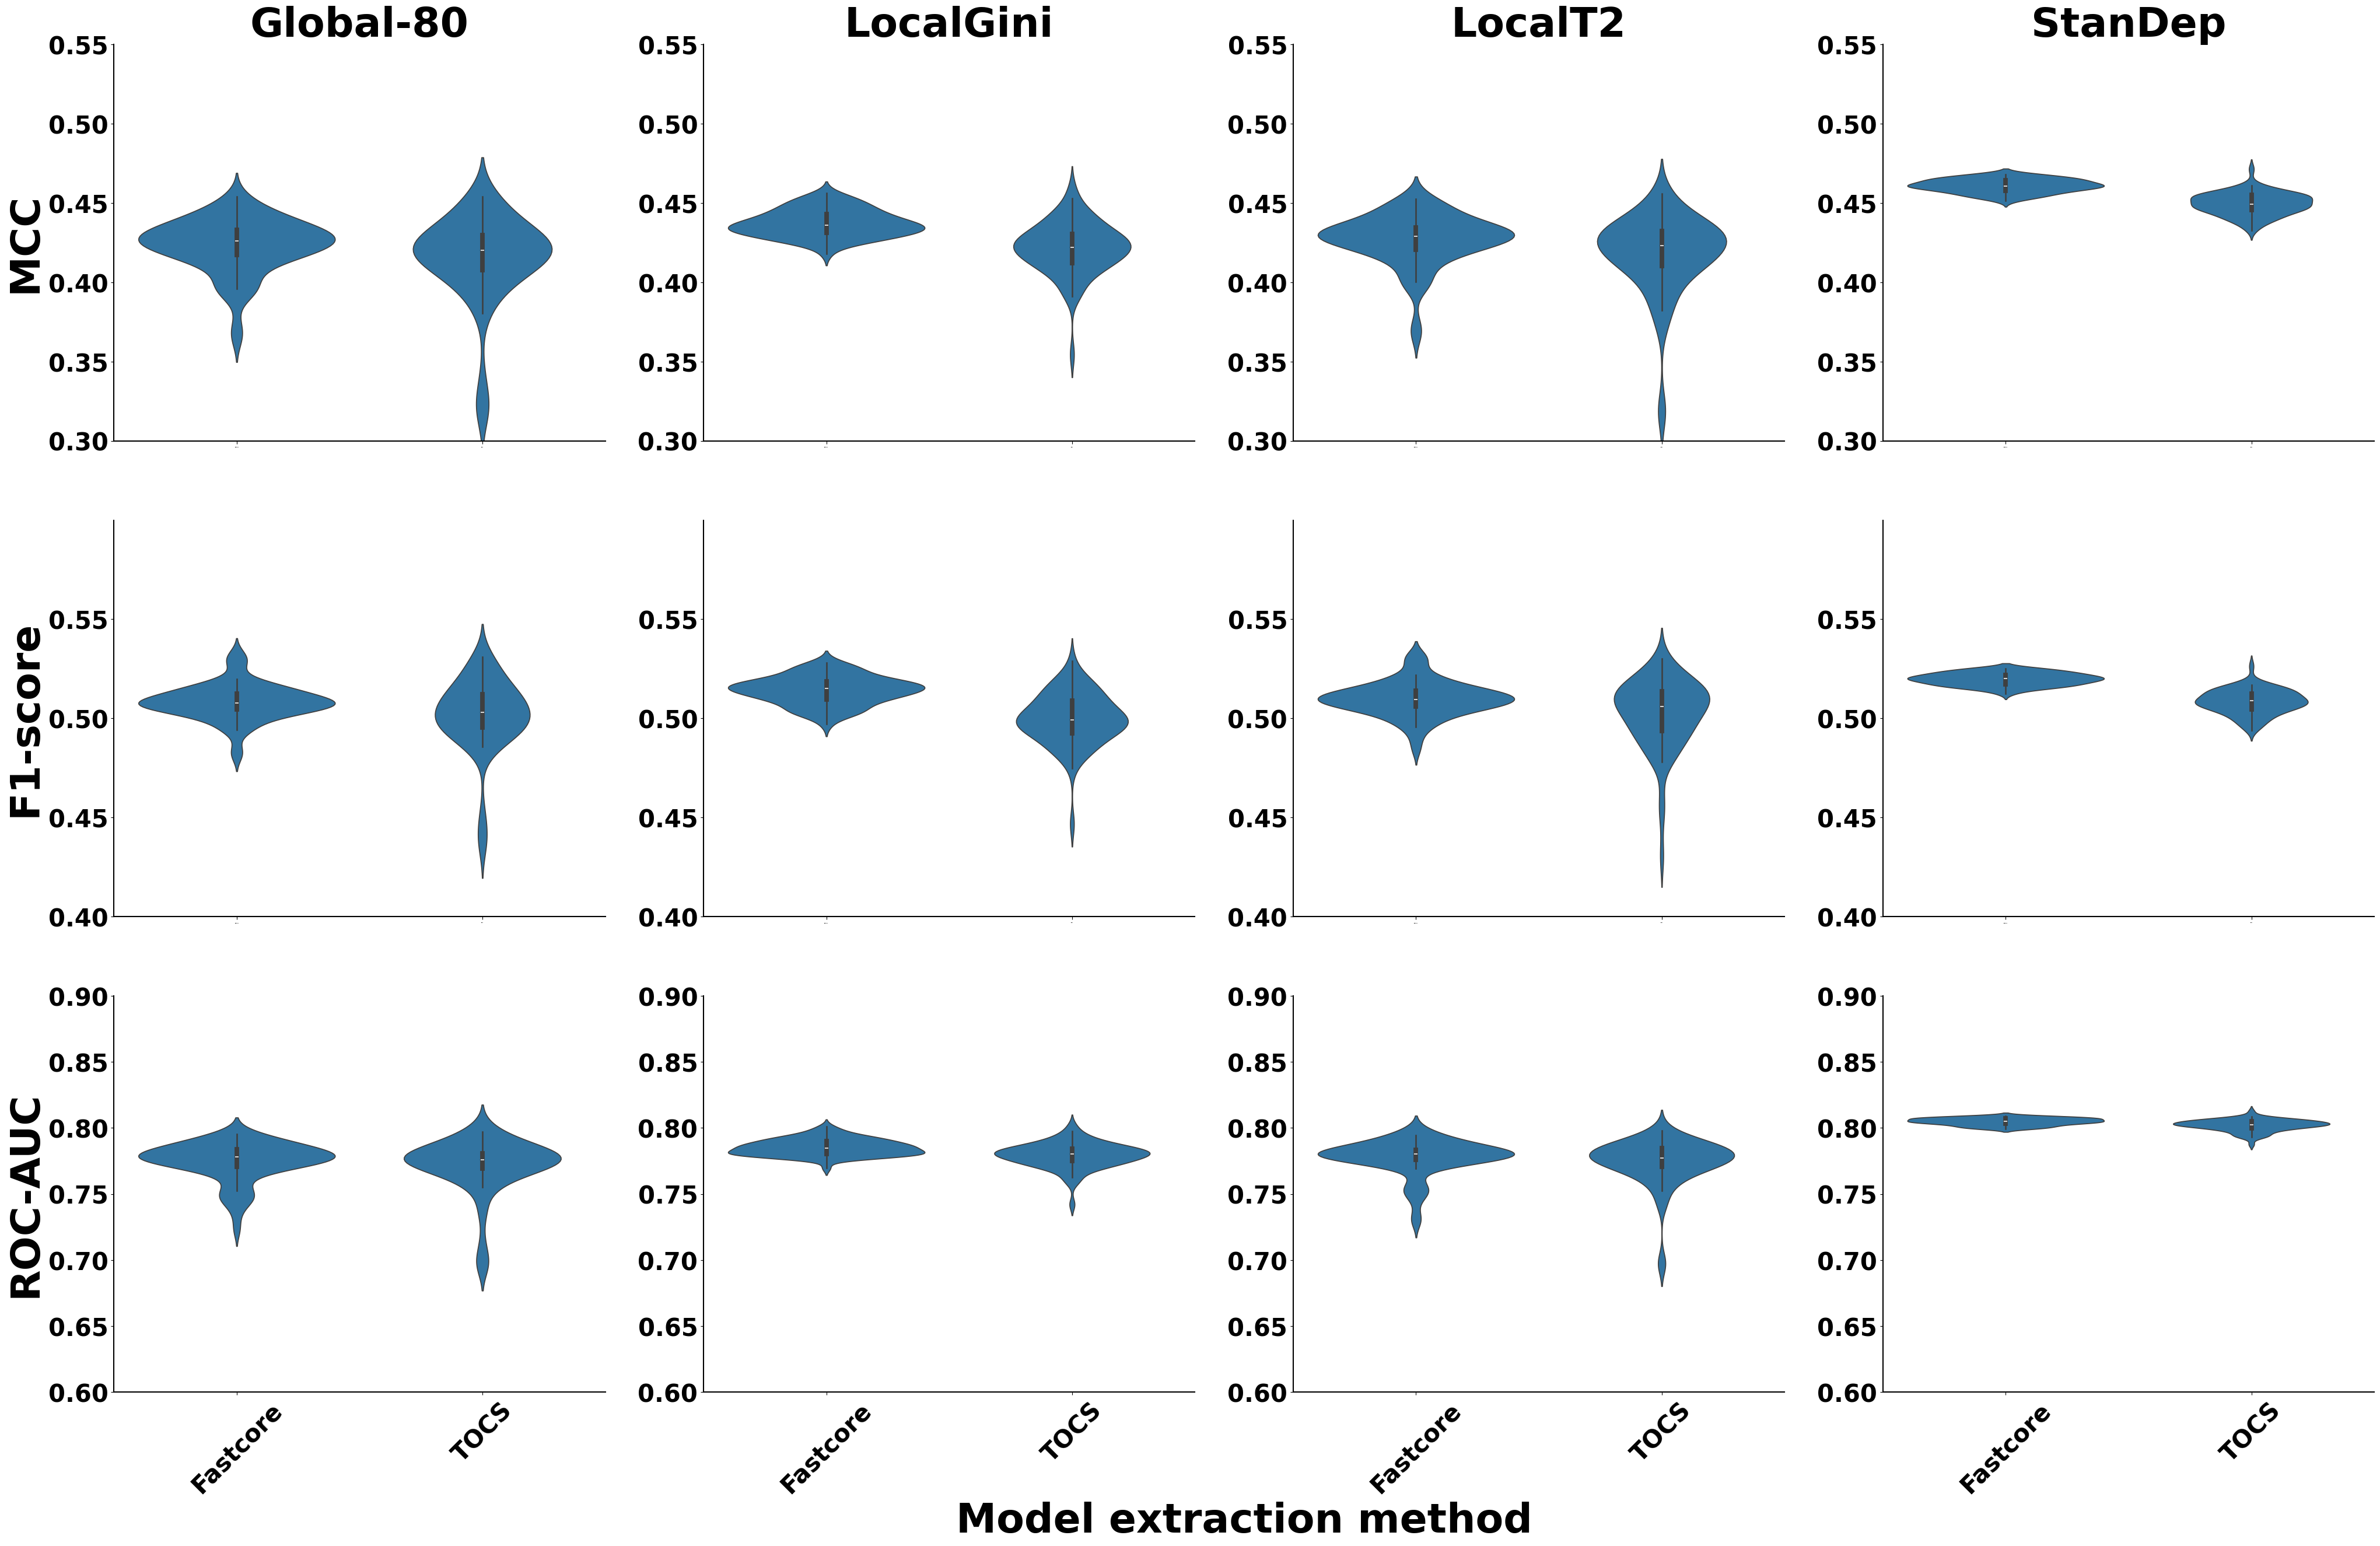

In [35]:
fig,axeses = plt.subplots(3,4,figsize=(10*5,10*3))
metrics = ['MCC','F1-score','ROC-AUC']
ylims = {'MCC':[0.3,0.55],'F1-score':[0.4,0.6],'ROC-AUC':[0.6,0.9]}
Thrs = ['Global-80','LocalGini','LocalT2','StanDep']
for i,metric in enumerate(metrics):
    axes = axeses[i]
    for t,ax in zip(Thrs,axes):
        sns.violinplot(data=df[df['Threshold']==t], x="MeM", y=metric,ax=ax)
        if i==0:
            ax.set_title(t,fontweight='bold',fontsize=50)
        ax.set_yticks(np.arange(ylims[metric][0], ylims[metric][1], 0.05))
        ax.set_ylim(ylims[metric][0], ylims[metric][1])
        # removing the spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        # remving the ylabel
        ax.set_ylabel('')
        # removing the xlabel
        ax.set_xlabel('')
    # reducing the spces between the subplots
    # plt.subplots_adjust(wspace=0.2)
    axes[0].set_ylabel(metric,fontsize=50,fontweight='bold')
    if i==2:
        axes[2].set_xlabel('Model extraction method',fontsize=50,fontweight='bold',x=-0.1,y=-0.2)
    # bold xticks and yticks
    for ax in axes:
        if i==2:
            plt.setp(ax.get_xticklabels(), fontweight='bold',fontsize=30,rotation=45)
        else:
            plt.setp(ax.get_xticklabels(), fontweight='bold',fontsize=0)
        plt.setp(ax.get_yticklabels(), fontweight='bold',fontsize=30)
plt.savefig('GeneEss.pdf',bbox_inches='tight')